In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [103]:
token_names_path = './DATA/TOKEN_DAILY'
token_names = os.listdir(token_names_path)
print(token_names)

['JUPITER', 'MONERO', 'MAKER', 'STARKNET', 'BITTENSOR', 'INJECTIVO', 'CORE', 'SEI', 'THOR', 'DOGWITFHAT', 'GALA', 'FLOKI', 'OKB', 'VECHAIN', 'ETHERIUM', 'USDT', 'FANTOM', 'USDC', 'PYTH NETWORK', 'BONK', 'BEAM', 'FETCH_AI', 'CELESTIA', 'SUI', 'ARWEAVE', 'LIDO', 'FLOW', 'THETA', 'BTC', 'AAVE', 'BITGET', 'BNB', 'ALGORAND', 'ONDO', 'SOLANA', 'XRP', 'OPTIMISM', 'ETHENA', 'STACKS']


In [104]:
token_path  = './DATA/TOKEN_DAILY/AAVE/'
token_files = os.listdir(token_path)
print(token_files)
token_data = []
for token_file in token_files:
    token = pd.read_csv(token_path + token_file, sep=';')
    token['symbol'] = 'AAVE'
    token_data.append(token)

['Aave_14_6_2023-13_6_2024_historical_data_coinmarketcap.csv', 'Aave_14_6_2023-13_6_2024_historical_data_coinmarketcap.csv:Zone.Identifier', 'Aave_14_6_2021-14_6_2022_historical_data_coinmarketcap.csv', 'Aave_14_6_2022-14_6_2023_historical_data_coinmarketcap.csv', 'Aave_14_6_2021-14_6_2022_historical_data_coinmarketcap.csv:Zone.Identifier', 'Aave_14_6_2020-14_6_2021_historical_data_coinmarketcap.csv', 'Aave_14_6_2020-14_6_2021_historical_data_coinmarketcap.csv:Zone.Identifier', 'Aave_14_6_2022-14_6_2023_historical_data_coinmarketcap.csv:Zone.Identifier']


In [105]:
token_data = pd.concat(token_data)

In [106]:
token_data.duplicated().sum()

6

In [107]:
token_data = token_data.drop_duplicates()

In [108]:
token_data['date'] = token_data['timeOpen'].str.split('T').str[0]

In [109]:
token_data.drop(columns=['timeOpen','timeClose','timeHigh','timeLow','timestamp','[ZoneTransfer]','name'], inplace=True)

In [110]:
token_data['date'] = pd.to_datetime(token_data['date'])

In [111]:
token_data=token_data.set_index('date')

In [112]:
token_data.sort_index(inplace=True)

In [113]:
token_data['close'].idxmax()

Timestamp('2021-05-18 00:00:00')

<Figure size 1500x700 with 0 Axes>

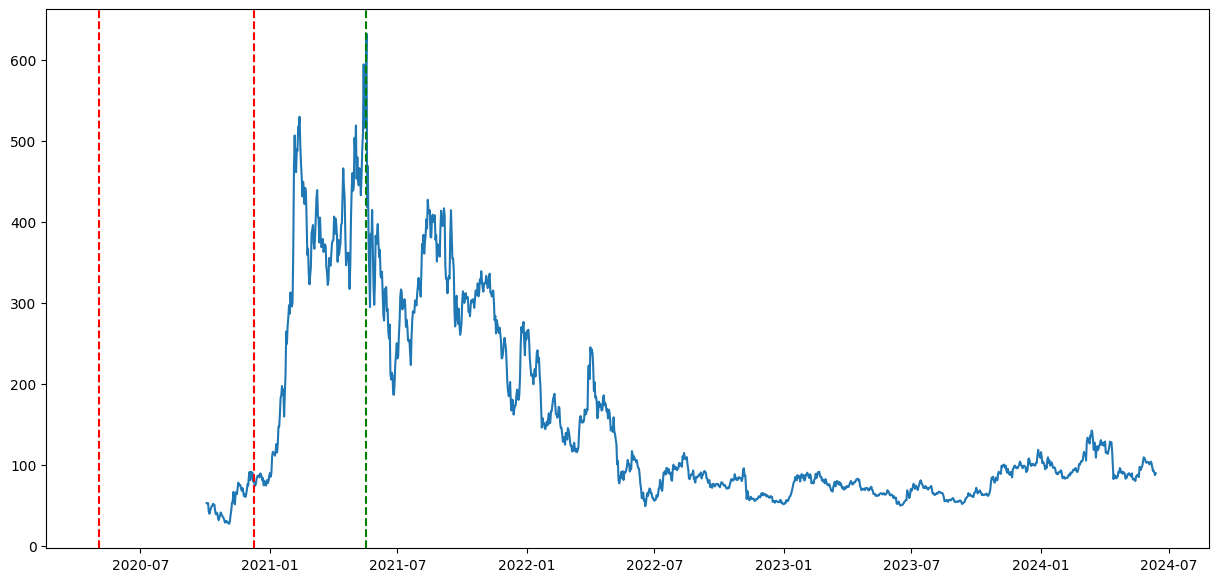

In [114]:
plt.figure(figsize=(15, 7))
plt.figure(figsize=(15, 7))
plt.plot(token_data['close'])
halving_day =pd.to_datetime('2020-05-3')
halving_bulrun=halving_day+pd.Timedelta(days=220)
halving_day_max_close  = token_data['close'].idxmax()
plt.axvline(x=halving_day, color='r', linestyle='--')
plt.axvline(x=halving_bulrun, color='r', linestyle='--')
plt.axvline(x=halving_day_max_close, color='g', linestyle='--')

In [115]:
halving_day_max_close = pd.to_datetime(halving_day_max_close)

In [116]:
halving_day_max_close

Timestamp('2021-05-18 00:00:00')

In [117]:
halving_day

Timestamp('2020-05-03 00:00:00')

In [118]:
diff = halving_day_max_close.tz_localize(None) - halving_day.tz_localize(None)

vamos a realizar el mismo proceso para los demas tokens y obtener el dia promedio donde se obtendra su maximo precio

In [119]:
def tokens_data_open_files(name):
    token_path  = './DATA/TOKEN_DAILY/'+name+'/'
    token_files = os.listdir(token_path)
    token_data = []
    for toke_file in token_files:
        token = pd.read_csv(token_path + toke_file, sep=';')
        token['symbol'] = name
        token_data.append(token)
    token_data = pd.concat(token_data)
    token_data['date'] = token_data['timeOpen'].str.split('T').str[0]
    token_data.drop(columns=['timeOpen','timeClose','timeHigh','timeLow','timestamp','[ZoneTransfer]','name'], inplace=True)
    token_data['date'] = pd.to_datetime(token_data['date'])
    token_data=token_data.set_index('date')
    token_data.drop_duplicates()
    token_data.sort_index(inplace=True)
    return token_data

In [120]:
tokens = []
for token in token_names:
    token_data = tokens_data_open_files(token)
    tokens.append(token_data) 

In [121]:
halving_days = [
    '2016-07-2',
    '2020-05-3',
    '2024-04-19'
]

halving_days = [pd.to_datetime(day) for day in halving_days]
halving_bulruns = [
    halving_days[0]+pd.Timedelta(days=250),
    halving_days[1]+pd.Timedelta(days=150),
    halving_days[2]+pd.Timedelta(days=150)
]

In [122]:
def get_max_close(token):
    max_close = []

    filter = (token.index.tz_localize(None) > halving_days[0].tz_localize(None)) & (token.index.tz_localize(None) < halving_days[1].tz_localize(None))
    token_halving = token.loc[filter]
    if token_halving.shape[0] > 0:
        max_close.append(token_halving['close'].idxmax())
    
    filter = (token.index.tz_localize(None) > halving_days[1].tz_localize(None)) & (token.index.tz_localize(None) < halving_days[2].tz_localize(None))
    token_halving = token.loc[filter]
    if token_halving.shape[0] > 0:
        max_close.append(token_halving['close'].idxmax())
    
    filter = (token.index.tz_localize(None) > halving_days[2].tz_localize(None))
    token_halving = token.loc[filter]
    if token_halving.shape[0] > 0:
        max_close.append(token_halving['close'].idxmax())
    
    return max_close

max_close = get_max_close(tokens[0])

In [123]:
max_close

[Timestamp('2024-03-31 00:00:00'), Timestamp('2024-05-20 00:00:00')]

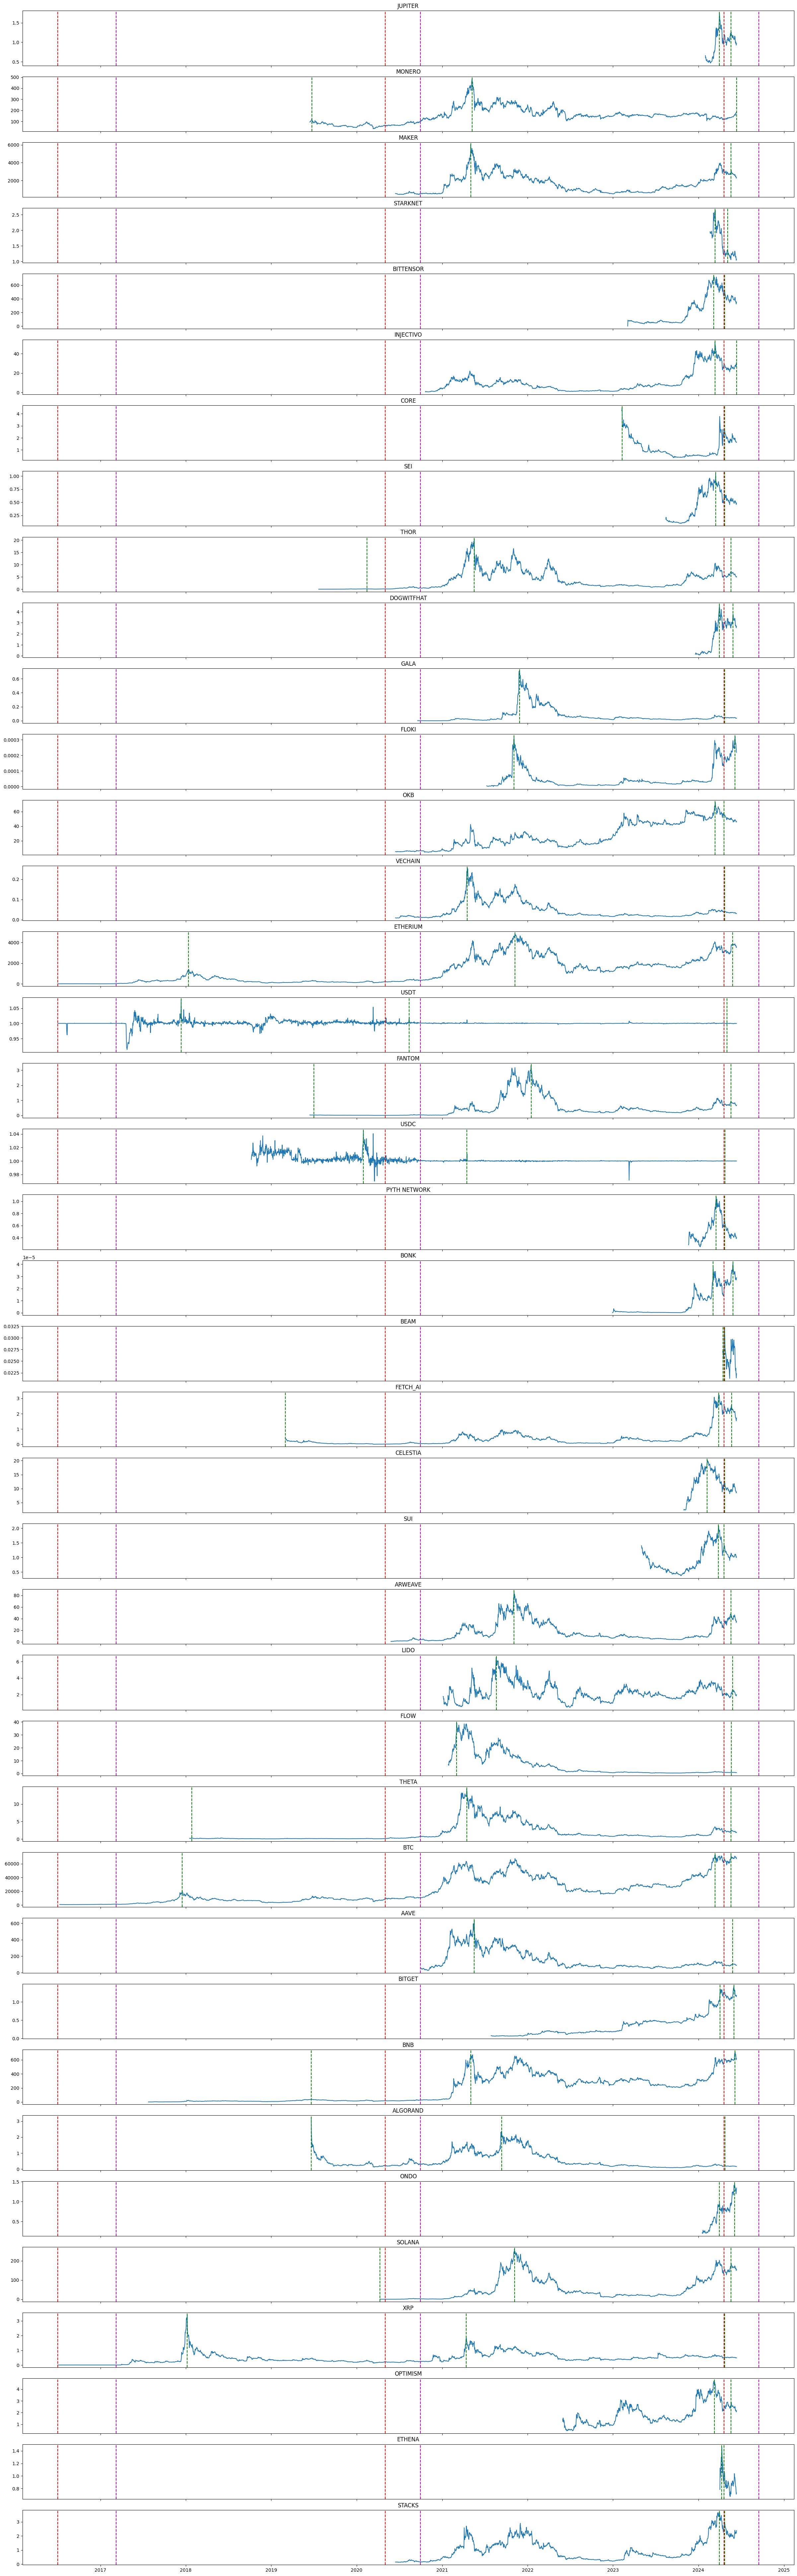

In [124]:
ax, fig = plt.subplots(figsize=(30, 100),nrows=len(tokens), ncols=1, sharex=True)
for i, token in enumerate(tokens):
    filter  = token.index.tz_localize(None) > halving_days[0].tz_localize(None)
    token = token.loc[filter]
    fig[i].plot(token['close'])
    for halving_day in halving_days:
        fig[i].axvline(x=halving_day, color='r', linestyle='--')
    for halving_bulrun in halving_bulruns:
        fig[i].axvline(x=halving_bulrun, color='m', linestyle='--')
    max_close = get_max_close(token)
    for day in max_close:
        fig[i].axvline(x=day, color='g', linestyle='--')
    fig[i].set_title(token['symbol'].iloc[0])

del grupo de 39 tokens recopilados de fecha de creacion, hay muchos con poca tiempo en desarrollo. Ademas tenemos en cuenta que el halving con mas registros es el tercero vamos a observar un frame obsevando este ventana de tiempo


In [125]:
halving_days = [
    '2020-05-3',
    '2024-04-19'
]

halving_days = [pd.to_datetime(day) for day in halving_days]
halving_bulruns = [
    halving_days[0]+pd.Timedelta(days=150),
    halving_days[1]+pd.Timedelta(days=150)
]

In [126]:
def get_max_close(token):
    max_close = []

    filter = (token.index.tz_localize(None) > halving_days[0].tz_localize(None)) & (token.index.tz_localize(None) < halving_days[1].tz_localize(None))
    token_halving = token.loc[filter]
    if token_halving.shape[0] > 0:
        max_close.append(token_halving['close'].idxmax())
    
    
    filter = (token.index.tz_localize(None) > halving_days[1].tz_localize(None))
    token_halving = token.loc[filter]
    if token_halving.shape[0] > 0:
        max_close.append(token_halving['close'].idxmax())
    
    return max_close

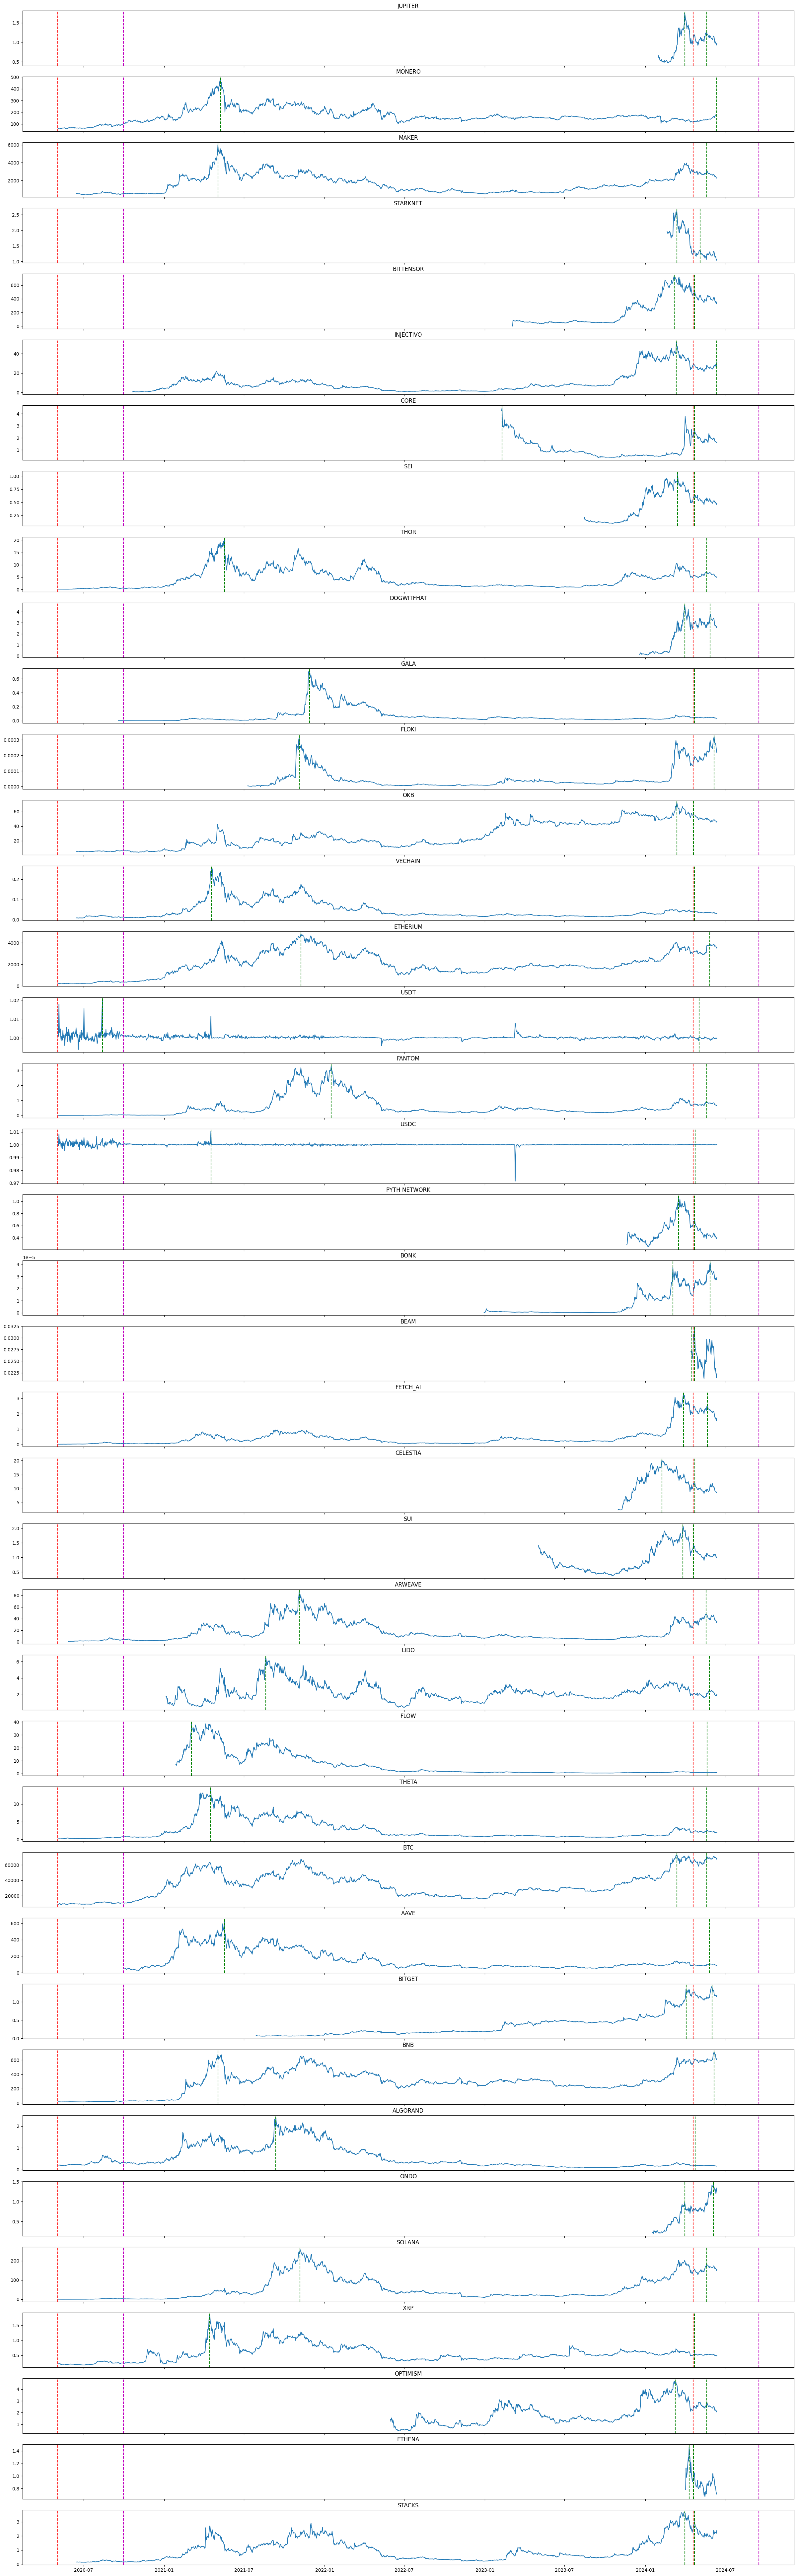

In [127]:
ax, fig = plt.subplots(figsize=(30, 100),nrows=len(tokens), ncols=1, sharex=True)
for i, token in enumerate(tokens):
    filter  = token.index.tz_localize(None) > halving_days[0].tz_localize(None)
    token = token.loc[filter]
    fig[i].plot(token['close'])

    for halving_day in halving_days:
        fig[i].axvline(x=halving_day, color='r', linestyle='--')
    for halving_bulrun in halving_bulruns:
        fig[i].axvline(x=halving_bulrun, color='m', linestyle='--')
    max_close = get_max_close(token)
    for day in max_close:
        fig[i].axvline(x=day, color='g', linestyle='--')
    fig[i].set_title(token['symbol'].iloc[0])

inspeccionando, y clasificando token podemos agrupar los siguientes por sus maximos obtenidos:
* BULRUN INFLUENCE

- XRP
- VECHAIN 
- THOR
- THETA
- MONERO
- MAKER
- GALA
- BNB
- AAVE

* SAME DAYS HIGH
- STACKS
- LIDO
- FLOW
- FANTOM
- FETCH_AI
- BEAM
- ARWEAVE

NEW HALVING INFLUENCE
- CELESTIA
- BTC
- BONK


In [128]:
tokens__=pd.concat(tokens)
tokens__.dropna(inplace=True)

In [129]:
tokens__.to_csv('tokensCleaned.csv', sep=';')